In [175]:
# Imports
import matplotlib.pyplot as plt
plt.style.use('plot_style.mplstyle')
import yaml
import numpy as np
import pingouin as pg
import pandas as pd
import scipy as sc

# Custom functions
from functions.dataloaders import load_data
from functions.signal_processing import preprocess_data

# Params
with open('params.yaml','r') as file:
    params = yaml.full_load(file)

# Plot footprints and calcium traces with associated colors

In [4]:
# Pick example session/mouse
session_path='../../datasets/calcium_imaging/M990/M990_legoOF_20190114'
data = load_data(session_path)
data = preprocess_data(data,params)

In [26]:
~data['running_ts']

array([ True, False,  True, ..., False, False,  True])

In [137]:
from scipy.stats import pearsonr as corr
from tqdm import tqdm
p_threshold = .05
idle_matrix = np.zeros((data['numNeurons'],data['numNeurons']))
run_matrix = np.zeros((data['numNeurons'],data['numNeurons']))

for i in tqdm(range(data['numNeurons'])):
    for j in range(data['numNeurons']):
        if j>i:
            temp_idle = corr(data['caTrace'][~data['running_ts'],i],data['caTrace'][~data['running_ts'],j])
            #if temp_idle[1] < p_threshold:
            idle_matrix[j,i] = temp_idle[0]
            
            temp_run = corr(data['caTrace'][data['running_ts'],i],data['caTrace'][data['running_ts'],j])
            #if temp_run[1] < p_threshold:    
            run_matrix[j,i] = temp_run[0]
        else:
            idle_matrix[j,i] = np.nan
            run_matrix[j,i] = np.nan            

100%|██████████| 805/805 [02:06<00:00,  6.36it/s]


/var/folders/6w/ytj5_yt9507dd2yb0htxhhfr0000gn/T/ipykernel_74468/222083029.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


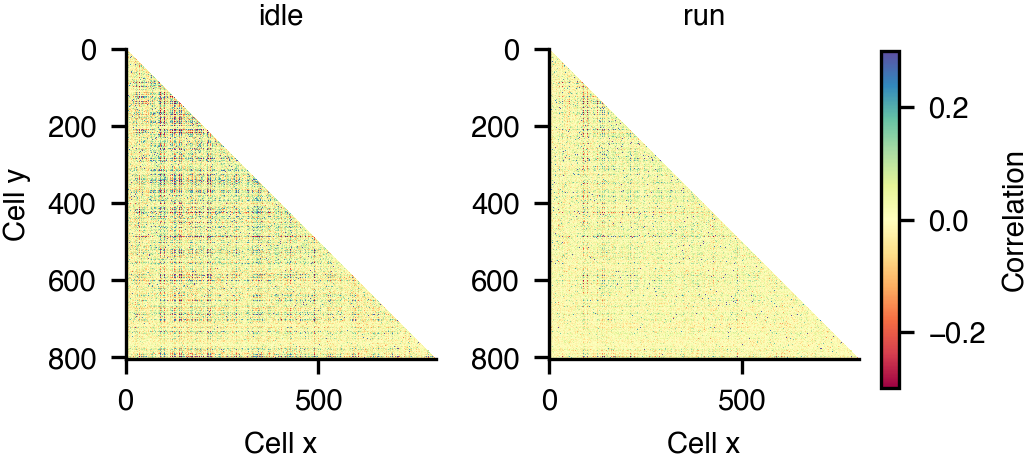

In [180]:
plt.figure(figsize=(3,1.5))
plt.subplot(121)
plt.imshow(idle_matrix, interpolation='none',vmin=-.3,vmax=.3, cmap='Spectral')
plt.title('idle')
plt.xlabel('Cell x')
plt.ylabel('Cell y')
#plt.axis('off')

plt.subplot(122)
plt.imshow(run_matrix, interpolation='none',vmin=-.3,vmax=.3, cmap='Spectral')
plt.title('run')
plt.xlabel('Cell x')
#plt.ylabel('Cell y')
#plt.axis('off')

cax = plt.axes([1, 0.15, 0.02, 0.75])
plt.colorbar(cax=cax, label='Correlation')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('results/figures/fig2/idle_run_corrs.pdf', bbox_inches='tight')

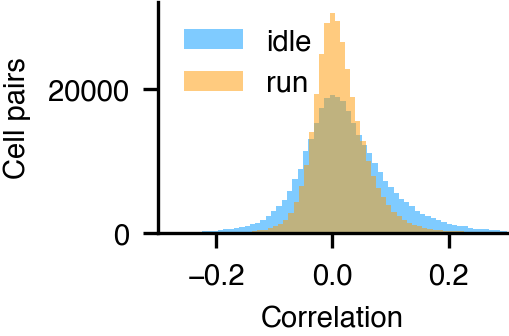

In [194]:
# Plot histogram
plt.hist(idle_matrix.flatten(), bins=200, color=[0,.6,1,.5], label='idle')
plt.hist(run_matrix.flatten(), bins=200, color=[1,.6,0,.5], label='run')
plt.xlim(-.3,.3)
plt.xlabel('Correlation')
plt.ylabel('Cell pairs')
plt.legend()
plt.savefig('results/figures/fig2/corr_histogram.pdf', bbox_inches='tight')


In [44]:
np.nanmax(run_matrix)

0.9078570848233892